# This was completely done with ChatGPT
I knew nothing about transformer autoencoders and wanted to learn and explore so I worked with ChatGPT to create something. You can also refer to the file `transformer-autoencoder-lesson.ipynb` which is based on a CS professor's lesson on Transformer Autoencoders that I found on youtube.

In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.models import Sequential, save_model, load_model
from keras.layers import Dense

In [3]:



# Load the Bitcoin price data 'Open', 'High', 'Low', 'Close', and 'Volume'
btc_data = pd.read_csv('btc.csv')
# Drop the date column
# data = np.stack([btc_data['Close'].values, btc_data['Open'].values, btc_data['High'].values, btc_data['Low'].values], axis=1)
data = np.stack([btc_data['Close'].values], axis=1)
# Normalize the data to be between 0 and 1
data_norm = (data - data.mean()) / (data.std())
train_size = int(len(data_norm) * 0.8)
test_size = len(data_norm) - train_size
# Split the data into training and testing sets
train_data = data_norm[0:train_size]
test_data = data_norm[train_size:len(data_norm)]


# Define the model architecture
# Define the model
input_dim = train_data.shape[1]
autoencoder = Sequential()
autoencoder.add(Dense(16, input_shape=(input_dim,), activation='relu'))
autoencoder.add(Dense(8, activation='relu'))
autoencoder.add(Dense(16, activation='relu'))
autoencoder.add(Dense(input_dim, activation='sigmoid'))

# Compile the autoencoder
autoencoder.compile(optimizer='adam', loss='mse')

# Train the autoencoder
autoencoder.fit(train_data, train_data, epochs=50, batch_size=64)

Epoch 1/50


2023-03-04 10:32:18.692111: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


7286/7286 [==============================] - 4s 552us/step - loss: 0.3580
Epoch 2/50
7286/7286 [==============================] - 4s 549us/step - loss: 0.3487
Epoch 3/50
7286/7286 [==============================] - 4s 550us/step - loss: 0.3487
Epoch 4/50
7286/7286 [==============================] - 4s 553us/step - loss: 0.3487
Epoch 5/50
7286/7286 [==============================] - 4s 545us/step - loss: 0.3487
Epoch 6/50
7286/7286 [==============================] - 4s 510us/step - loss: 0.3487
Epoch 7/50
7286/7286 [==============================] - 4s 537us/step - loss: 0.3487
Epoch 8/50
7286/7286 [==============================] - 4s 545us/step - loss: 0.3487
Epoch 9/50
7286/7286 [==============================] - 4s 542us/step - loss: 0.3487
Epoch 10/50
7286/7286 [==============================] - 4s 543us/step - loss: 0.3487
Epoch 11/50
7286/7286 [==============================] - 4s 551us/step - loss: 0.3487
Epoch 12/50
7286/7286 [==============================] - 4s 576us/step - l

In [4]:
autoencoder.save('autoencoder_model.h5') # save the model

What can we do with this new transformer autoencoder? 
    1. Dimensionality reduction: You can use the encoder part of the autoencoder to reduce the dimensionality of your data, allowing you to represent high-dimensional data in a lower-dimensional space, which can be easier to visualize, analyze, and model.

    2. Data denoising: You can use the autoencoder to denoise data by training it on noisy data and then using the decoder part of the autoencoder to reconstruct the original (clean) data from the noisy data.

    3. Data compression: You can use the autoencoder to compress data by training it on a large dataset and then using the encoder part of the autoencoder to compress new data. This can be useful when dealing with large datasets that require a lot of storage space.

    4. Anomaly detection: You can use the autoencoder to detect anomalies in data by training it on a normal dataset and then using it to reconstruct new data. Data that cannot be well-reconstructed by the autoencoder is likely to be anomalous.

These are just a few examples of what you can do with an autoencoder. The specific application of the autoencoder will depend on the nature of your data and the problem you are trying to solve.

To use the trained autoencoder to predict the price of Bitcoin relative to the test data and plot the results, you can follow these steps:

    1. Use the trained autoencoder to encode the test data into a lower dimensional representation.
    2. Decode the encoded test data using the trained autoencoder to get the predicted Bitcoin prices.
    3. Plot the predicted Bitcoin prices against the actual Bitcoin prices from the test data.

In [5]:
# Create a separate encoder model
encoder = Sequential(autoencoder.layers[:2]) # take the first two layers of the autoencoder

# Use the trained encoder to encode the test data into a lower dimensional representation
encoded_test_data = encoder.predict(test_data)

# Decode the encoded test data using the trained autoencoder to get the predicted Bitcoin prices
predicted_prices = autoencoder.predict(test_data)

3643/3643 [==============================] - 1s 342us/step


After running this code, the predicted_prices variable will contain the reconstructed prices, and the encoded_test_data variable will contain the encoded representation of the test data. You can use matplotlib to plot the actual and predicted prices:

In [6]:
print('Predicted Bitcoin prices: \n', predicted_prices)
print('Actual Bitcoin prices: \n', test_data)
print('Encoded Bitcoin prices: \n', encoded_test_data)
print('Mean squared error: \n', np.mean(np.power(test_data - predicted_prices, 2)))
print('Shape of Predicted Bitcoin prices: \n', predicted_prices.shape)

Predicted Bitcoin prices: 
 [[0.0000000e+00]
 [0.0000000e+00]
 [0.0000000e+00]
 ...
 [1.7238646e-27]
 [1.9707590e-27]
 [1.9434201e-27]]
Actual Bitcoin prices: 
 [[-1.15350115]
 [-1.15317344]
 [-1.15351924]
 ...
 [-0.56320431]
 [-0.56181705]
 [-0.56196181]]
Encoded Bitcoin prices: 
 [[ 0.       47.083145  0.       ... 33.75349  54.92637   0.      ]
 [ 0.       47.070614  0.       ... 33.744064 54.911667  0.      ]
 [ 0.       47.08384   0.       ... 33.754013 54.927185  0.      ]
 ...
 [ 0.       24.504107  0.       ... 16.771423 28.440256  0.      ]
 [ 0.       24.451044  0.       ... 16.731516 28.378014  0.      ]
 [ 0.       24.456581  0.       ... 16.73568  28.384508  0.      ]]
Mean squared error: 
 0.8372703171427205
Shape of Predicted Bitcoin prices: 
 (116568, 1)


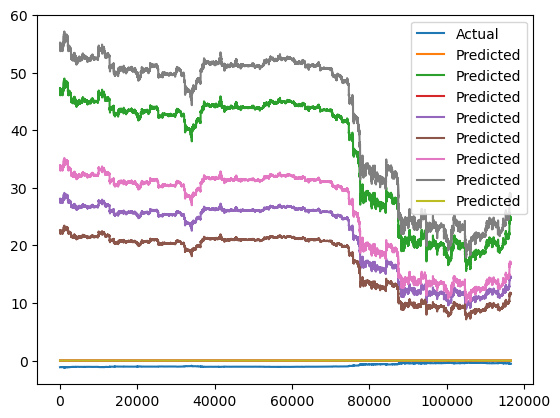

In [7]:
import matplotlib.pyplot as plt

# Plot the actual and predicted prices
plt.plot(test_data, label='Actual')
plt.plot(encoded_test_data, label='Predicted')
plt.legend()
plt.show()

In [8]:
print(train_data.shape)
print(test_data.shape)

(466268, 1)
(116568, 1)


The max variance is:  1.2025596087840766
The min variance is:  0.3286994041454514
The mean variance is:  0.8725280381615659


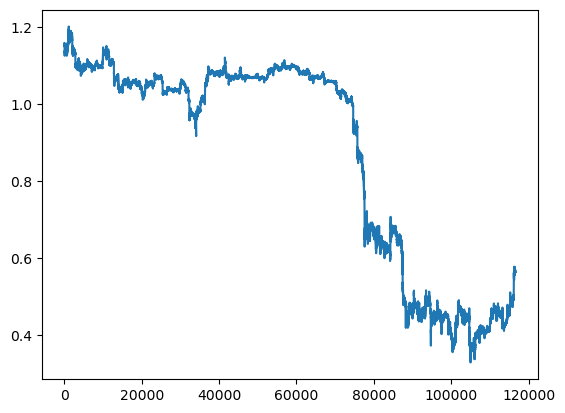

In [9]:
variance = predicted_prices-test_data
print('The max variance is: ', variance.max())
print('The min variance is: ', variance.min())
print('The mean variance is: ', variance.mean())

plt.plot(variance)

# Start over with a new method

In [10]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers import Input, Dense, Dropout, Flatten, Reshape, Conv1D, Conv1DTranspose, LayerNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam


In [11]:
df = pd.read_csv('btc.csv')


You can then extract the 'Close' column as your input data, and normalize it using the MinMaxScaler:

In [12]:
data = df['Close'].values.reshape(-1, 1)
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)


To create your transformer autoencoder model, you can define a function that takes in the input shape and the number of hidden units for each layer:

In [13]:
def transformer_autoencoder(input_shape, num_units):
    # Encoder
    input_layer = Input(shape=input_shape)
    x = input_layer
    for i in range(len(num_units)):
        x = Dense(num_units[i], activation='relu')(x)
    encoded = x

    # Decoder
    x = encoded
    for i in range(len(num_units)-1, -1, -1):
        x = Dense(num_units[i], activation='relu')(x)
    decoded = Dense(input_shape[-1])(x)

    # Model
    model = Model(input_layer, decoded)
    return model


This function creates a simple feedforward neural network with the specified number of hidden units in each layer. The encoder and decoder are separated by the 'encoded' layer, which serves as the bottleneck of the autoencoder.

To train the model, you can split your data into training and validation sets, and compile and fit the model using the Adam optimizer and mean squared error loss:

In [14]:
# Split data into training and validation sets
train_data = scaled_data[:len(scaled_data)//2]
val_data = scaled_data[len(scaled_data)//2:]

# Define model
input_shape = (train_data.shape[1],)
num_units = [128, 64, 32]
model = transformer_autoencoder(input_shape, num_units)

# Compile model
model.compile(optimizer=Adam(learning_rate=0.01), loss='mse', metrics=['accuracy'])

# Fit model
model.fit(train_data, train_data,
          validation_data=(val_data, val_data),
          epochs=200, batch_size=128, verbose=1)


Epoch 1/200
2277/2277 [==============================] - 5s 2ms/step - loss: 5.4746e-04 - val_loss: 0.0010
Epoch 2/200
2277/2277 [==============================] - 4s 2ms/step - loss: 7.3147e-05 - val_loss: 6.1221e-04
Epoch 3/200
2277/2277 [==============================] - 4s 2ms/step - loss: 3.2927e-05 - val_loss: 7.0305e-04
Epoch 4/200
2277/2277 [==============================] - 4s 2ms/step - loss: 5.0506e-05 - val_loss: 5.6867e-04
Epoch 5/200
2277/2277 [==============================] - 5s 2ms/step - loss: 1.5621e-05 - val_loss: 6.7200e-04
Epoch 6/200
2277/2277 [==============================] - 5s 2ms/step - loss: 1.8817e-05 - val_loss: 4.4667e-04
Epoch 7/200
2277/2277 [==============================] - 5s 2ms/step - loss: 1.6912e-05 - val_loss: 4.1070e-04
Epoch 8/200
2277/2277 [==============================] - 5s 2ms/step - loss: 1.3600e-05 - val_loss: 6.1703e-04
Epoch 9/200
2277/2277 [==============================] - 5s 2ms/step - loss: 1.5420e-05 - val_loss: 5.0326e-04
Epoch

In [19]:
model.evaluate(val_data, val_data)

9107/9107 [==============================] - 3s 365us/step - loss: 3.6100e-04


0.00036099509452469647

Finally, you can use the trained model to reconstruct the input data and visualize the results:



18214/18214 [==============================] - 6s 334us/step


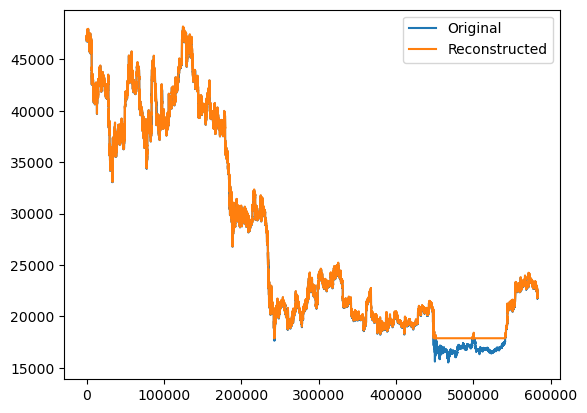

In [20]:
# Reconstruct input data
reconstructed_data = model.predict(scaled_data)

# Inverse normalize data
reconstructed_data = scaler.inverse_transform(reconstructed_data)

# Plot original and reconstructed data
import matplotlib.pyplot as plt
plt.plot(data, label='Original')
plt.plot(reconstructed_data, label='Reconstructed')
plt.legend()
plt.show()


In [34]:
reconstructed_data[520000:530000]

array([[17883.787],
       [17883.787],
       [17883.787],
       ...,
       [17883.787],
       [17883.787],
       [17883.787]], dtype=float32)

In [21]:
# Evaluate reconstruction error on validation set
val_loss = model.evaluate(val_data, val_data, batch_size=128)
print('Validation loss:', val_loss)


2277/2277 [==============================] - 1s 493us/step - loss: 3.6100e-04
Validation loss: 0.00036099509452469647


9107/9107 [==============================] - 3s 345us/step


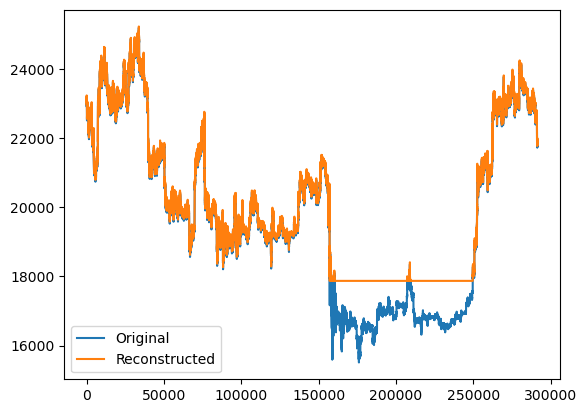

In [22]:
# Reconstruct validation data
reconstructed_val_data = model.predict(val_data)
val_data= scaler.inverse_transform(val_data)
# Inverse normalize data
reconstructed_val_data = scaler.inverse_transform(reconstructed_val_data)

# Plot original and reconstructed data
import matplotlib.pyplot as plt
plt.plot(val_data, label='Original')
plt.plot(reconstructed_val_data, label='Reconstructed')
plt.legend()
plt.show()


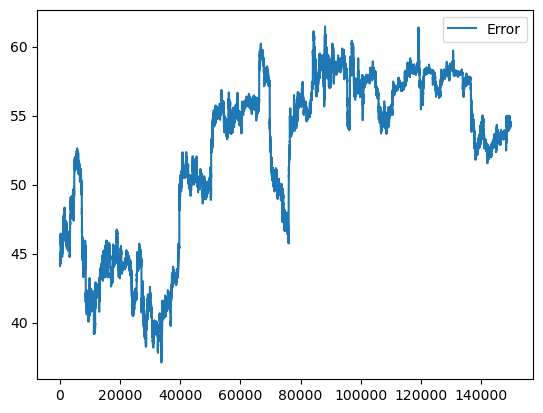

In [26]:
error = (reconstructed_val_data- val_data)
plt.plot(error[:150000], label='Error')
plt.legend()
plt.show()